<a href="https://colab.research.google.com/github/MariiaZimokha/notebooks/blob/main/kaggle/Future_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")

In [4]:
df.head

<bound method NDFrame.head of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


* **TV**: Advertising cost spent in dollars for advertising on TV;
* **Radio**: Advertising cost spent in dollars for advertising on Radio;
* **Newspaper**: Advertising cost spent in dollars for advertising on Newspaper;
* Sales: Number of units sold;

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [55]:
def plot_graph(X, Y, x_label="Some"):
  # plot
  fig, ax = plt.subplots()

  ax.scatter(X, Y, label="Sales")
                    # trendline="ols")
  plt.xlabel(x_label)
  plt.ylabel("Sales")
  sns.regplot(x=X, y=Y, ci=False, line_kws={'color':'red'});
  plt.show()
  # plt.scatter(X, Y)


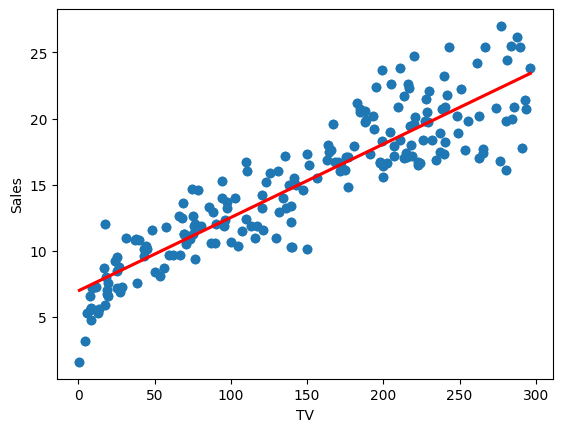

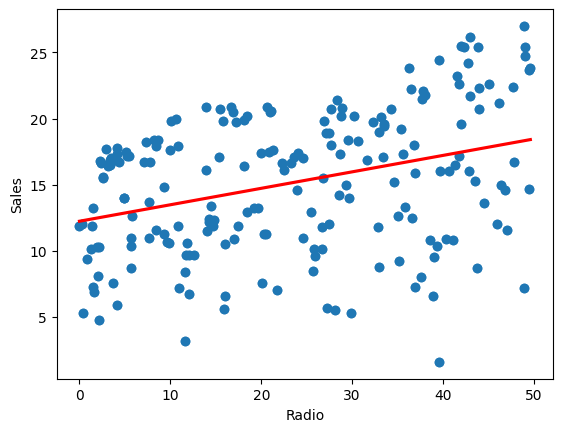

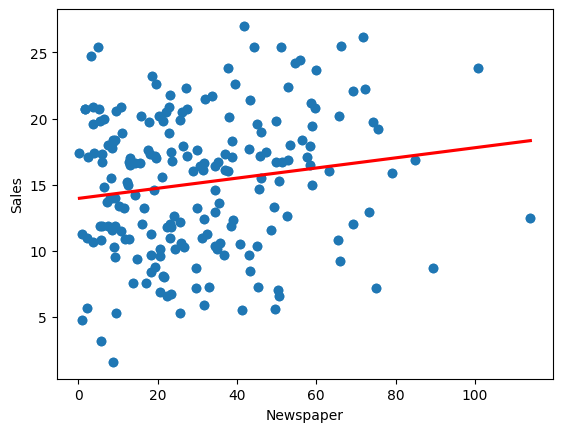

In [57]:
plot_graph(df["TV"], df["Sales"], "TV")
plot_graph(df["Radio"], df["Sales"], "Radio")
plot_graph(df["Newspaper"], df["Sales"], "Newspaper")


In [15]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [16]:
correlation = df.corr()
correlation["Sales"].sort_values(ascending=False)

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = np.array(df.drop(["Sales"], 1))
y = np.array(df["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.3, 
                                                random_state=42)



<ipython-input-36-d1ab1573eb81>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(["Sales"], 1))


In [37]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [38]:
y_pred = model.predict(xtest)

In [41]:
y_pred

array([16.91511512, 20.38554445, 23.61492832,  9.22565677, 21.86366378,
       12.47673434, 21.13545307,  8.59480345, 17.10206692, 16.57668108,
        8.97313482,  8.30485298, 17.78492754,  8.1216232 , 12.45394152,
       14.73822063,  8.04320903, 17.88150523, 10.90792515, 20.49677834,
       20.60147616, 12.27105794, 11.01020756, 22.21538326,  9.37729644,
        7.75915886, 20.86169623, 13.7643628 , 10.64410416,  7.99360692,
       15.78871013, 10.5924398 , 20.76038994, 10.25121926, 21.40779104,
       21.26603007, 12.28676609, 22.63930843, 12.58090014,  6.30053312,
       11.77249775, 15.25928683,  9.8404516 ,  9.37145421, 17.08301809,
        7.10548951, 10.19471067, 15.20872794, 10.94160634, 11.72724142,
       13.90202178, 14.55779863, 10.35633677,  9.22913323,  8.87535042,
       12.29082115, 10.44479522, 24.94140428,  7.84869225, 15.76009495])

In [43]:
ytest

array([16.9, 22.4, 21.4,  7.3, 24.7, 12.6, 22.3,  8.4, 16.5, 16.1, 11. ,
        8.7, 16.9,  5.3, 10.3, 16.7,  5.5, 16.6, 11.3, 18.9, 19.7, 12.5,
       10.9, 22.2, 11.3,  8.1, 21.7, 13.4, 10.6,  5.7, 15.6, 11.3, 23.7,
        8.7, 16.1, 20.7, 11.6, 20.8, 11.9,  6.9, 11. , 14.8, 10.1,  9.7,
       16.6,  7.6, 10.5, 14.6, 10.4, 12. , 14.6, 16.7,  7.2,  6.6,  9.4,
       11. , 10.9, 25.4,  7.6, 16.7])

In [45]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(ytrain, model.predict(xtrain)))

print(mean_squared_error(ytest, y_pred))

2.879169913630873
2.3019573602856815


### DecisionTree

In [50]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(max_depth=3)
model_dt.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=3)

In [51]:
y_pred = model_dt.predict(xtest)

In [52]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(ytrain, model_dt.predict(xtrain)))

print(mean_squared_error(ytest, y_pred))

2.6035248669032827
3.987315606225897
